<a class="anchor" id="">

# Import Libraries

</a>

In [44]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Scipy
from scipy.stats import uniform, randint

# Sklearn - Feature Selection
from sklearn.feature_selection import mutual_info_classif, RFE

# Sklearn - Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Sklearn - Imputation
from sklearn.impute import KNNImputer, SimpleImputer

# Sklearn - Model Selection
from sklearn.model_selection import (
    train_test_split, 
    learning_curve, 
    GridSearchCV, 
    RandomizedSearchCV,
    cross_val_score
)

# Sklearn - Linear Models
from sklearn.linear_model import (
    Lasso, 
    LinearRegression, 
    LogisticRegression
)

# Sklearn - Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier,
    VotingClassifier
)
from sklearn.naive_bayes import GaussianNB

# Sklearn - Metrics
from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    make_scorer,
)

# Plot settings / Warning ignoring 
sns.set_palette("flare")
warnings.simplefilter(action='ignore', category=FutureWarning)

<a class="anchor" id="">

# Import Data 
</a>


In [ ]:
test = pd.read_csv("data/obesity_test.csv")
train = pd.read_csv("data/obesity_train.csv")

<a class="anchor" id="">

# Explore Data 

</a>

In [48]:
train.head()

,id,age,alcohol_freq,caloric_freq,devices_perday,eat_between_meals,gender,height,marrital_status,meals_perday,...,parent_overweight,physical_activity_perweek,region,siblings,smoke,transportation,veggies_freq,water_daily,weight,obese_level
0,1,21.0,Never,no,up to 5,Sometimes,Female,1.62,NaN,3.0,...,yes,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,64.0,Normal_Weight
1,2,23.0,Frequently,no,up to 5,Sometimes,Male,1.80,NaN,3.0,...,yes,3 to 4,LatAm,0.0,no,Public,Sometimes,1 to 2,77.0,Normal_Weight
2,3,NaN,Frequently,no,up to 2,Sometimes,Male,1.80,NaN,3.0,...,no,3 to 4,LatAm,2.0,no,Walk,Always,1 to 2,87.0,Overweight_Level_I
3,4,22.0,Sometimes,no,up to 2,Sometimes,Male,1.78,NaN,1.0,...,no,NaN,LatAm,3.0,no,Public,Sometimes,1 to 2,90.0,Overweight_Level_II
4,5,22.0,Sometimes,no,up to 2,Sometimes,Male,1.64,NaN,3.0,...,no,5 or more,LatAm,3.0,no,Public,Sometimes,1 to 2,53.0,Normal_Weight


In [49]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1611.0,NaN,NaN,NaN,806.0,465.199957,1.0,403.5,806.0,1208.5,1611.0
age,1545.0,NaN,NaN,NaN,24.344984,6.474498,6.0,20.0,23.0,26.0,88.0
alcohol_freq,1575,4,Sometimes,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
caloric_freq,1591,2,yes,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
devices_perday,1589,3,up to 2,708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eat_between_meals,1552,4,Sometimes,1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1591,2,Male,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,1597.0,NaN,NaN,NaN,1.704108,0.095567,1.29,1.63,1.7,1.77,2.19
marrital_status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meals_perday,1602.0,NaN,NaN,NaN,2.684145,0.817584,1.0,3.0,3.0,3.0,4.0


In [50]:
# Seeing the % of missing values in each column 

for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
age - 4%
alcohol_freq - 2%
caloric_freq - 1%
devices_perday - 1%
eat_between_meals - 4%
gender - 1%
height - 1%
marrital_status - 100%
meals_perday - 1%
monitor_calories - 2%
parent_overweight - 1%
physical_activity_perweek - 35%
region - 4%
siblings - 1%
smoke - 1%
transportation - 2%
veggies_freq - 2%
water_daily - 2%
weight - 3%
obese_level - 0%


In [51]:
# Seeing the different values for each column to help decide what encoding to use 

for column in train.columns:
    print(f"Unique values in '{column}':")
    print(train[column].unique())
    print() 

Unique values in 'id':
[   1    2    3 ... 1609 1610 1611]

Unique values in 'age':
[21. 23. nan 22. 24. 41. 27. 52. 20. 19. 39. 30. 25. 29. 26. 38. 18. 17.
 15. 61. 44. 31. 34. 36. 32.  6. 40. 35. 45. 33. 51. 28. 16. 37. 42. 43.
 46. 55. 47. 88.]

Unique values in 'alcohol_freq':
['Never' 'Frequently' 'Sometimes' 'Always' nan]

Unique values in 'caloric_freq':
['no' 'yes' nan]

Unique values in 'devices_perday':
['up to 5' 'up to 2' 'more than 5' nan]

Unique values in 'eat_between_meals':
['Sometimes' 'Frequently' 'Never' 'Always' nan]

Unique values in 'gender':
['Female' 'Male' nan]

Unique values in 'height':
[1.62 1.8  1.78 1.64 1.72 1.65 1.93 1.69 1.6  1.85 1.7  1.75 1.68 1.77
 1.79 1.5   nan 1.67 1.66 1.81 1.53 1.82 1.55 1.61 1.76 1.63 1.52 1.56
 1.57 1.58 1.87 1.89 1.74 2.19 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.71 1.45 1.98 1.51 1.88 1.86 1.46 1.49 1.95 1.94 1.29]

Unique values in 'marrital_status':
[nan]

Unique values in 'meals_perday':
[ 3.  1.  4. nan  2.]

Uni

In [52]:
print(train.shape)
print(test.shape)

(1611, 21)
(500, 20)


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1611 non-null   int64  
 1   age                        1545 non-null   float64
 2   alcohol_freq               1575 non-null   object 
 3   caloric_freq               1591 non-null   object 
 4   devices_perday             1589 non-null   object 
 5   eat_between_meals          1552 non-null   object 
 6   gender                     1591 non-null   object 
 7   height                     1597 non-null   float64
 8   marrital_status            0 non-null      float64
 9   meals_perday               1602 non-null   float64
 10  monitor_calories           1572 non-null   object 
 11  parent_overweight          1591 non-null   object 
 12  physical_activity_perweek  1046 non-null   object 
 13  region                     1544 non-null   objec

In [54]:
# value counts for each categorical column

categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n{train[col].value_counts()}\n")


Value counts for alcohol_freq:
alcohol_freq
Sometimes     1057
Never          466
Frequently      51
Always           1
Name: count, dtype: int64

Value counts for caloric_freq:
caloric_freq
yes    1400
no      191
Name: count, dtype: int64

Value counts for devices_perday:
devices_perday
up to 2        708
up to 5        696
more than 5    185
Name: count, dtype: int64

Value counts for eat_between_meals:
eat_between_meals
Sometimes     1306
Frequently     170
Never           41
Always          35
Name: count, dtype: int64

Value counts for gender:
gender
Male      826
Female    765
Name: count, dtype: int64

Value counts for monitor_calories:
monitor_calories
no     1501
yes      71
Name: count, dtype: int64

Value counts for parent_overweight:
parent_overweight
yes    1309
no      282
Name: count, dtype: int64

Value counts for physical_activity_perweek:
physical_activity_perweek
1 to 2       595
3 to 4       360
5 or more     91
Name: count, dtype: int64

Value counts for region:
r

In [55]:
train.duplicated().sum() #check to see if we have to deal with any duplicates 

0

### Findings 

##### From our exploration we found that:
- Marital_status can be dropped as all values are missing
- Region can be dropped as is the same or missing for every person
- physical_activity_perweek has a very high % of missing values so we will take more care filling them in as this     could be an important feature
- Every other column has minimal missing values
- We are not dealing with any duplicated rows
- A lot of the columns need to be encoded for use in our models
- A lot of the catagorical columns have an option with far higher fequencies  

<a class="anchor" id="">

# Data Visualizations 

</a>

In [58]:
desired_order = ['Insufficient_Weight',
                'Normal_Weight',
                'Overweight_Level_I',
                'Overweight_Level_II',
                'Obesity_Type_I',
                'Obesity_Type_II',
                'Obesity_Type_III']

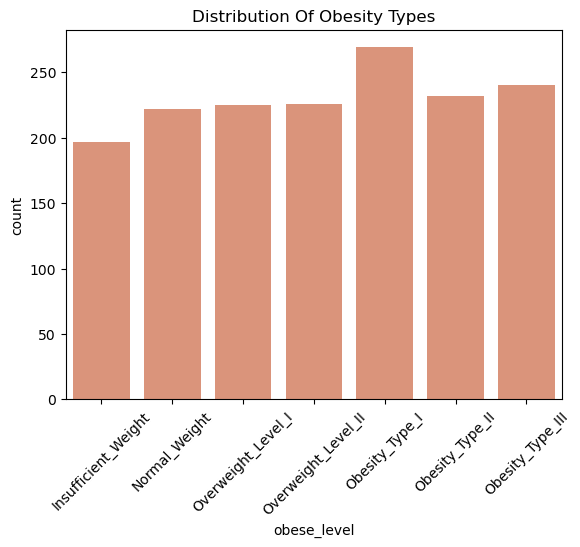

In [59]:
# See how the different obesity types are distributed overall

sns.countplot(data=train, x='obese_level', order=desired_order)
plt.title('Distribution Of Obesity Types')
plt.xticks(rotation=45)
plt.show()

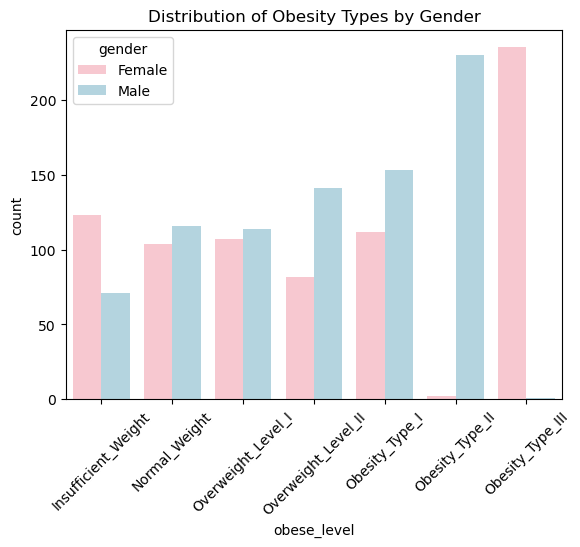

In [60]:
# Distribution of obesity types based on gender 

sns.countplot(data=train, x='obese_level', hue='gender', palette=['pink', 'lightblue'], order=desired_order)
plt.title('Distribution of Obesity Types by Gender')
plt.xticks(rotation=45)
plt.show()

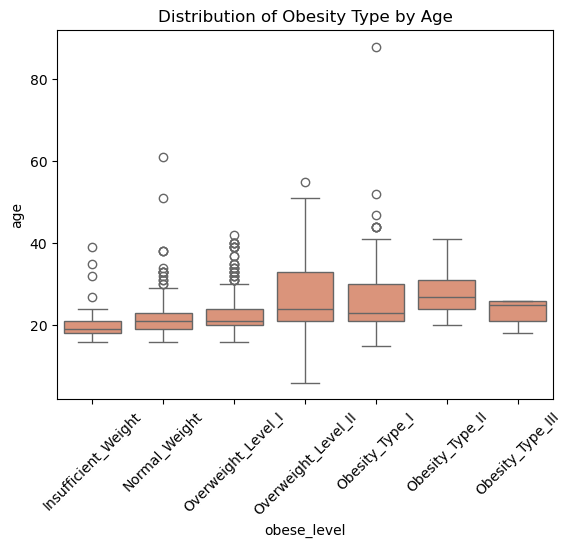

In [88]:
# Distribution of obesity types based on age
sns.boxplot(data=train, x='obese_level', y='age', order=desired_order)
plt.title('Distribution of Obesity Type by Age')
plt.xticks(rotation=45)
plt.show()

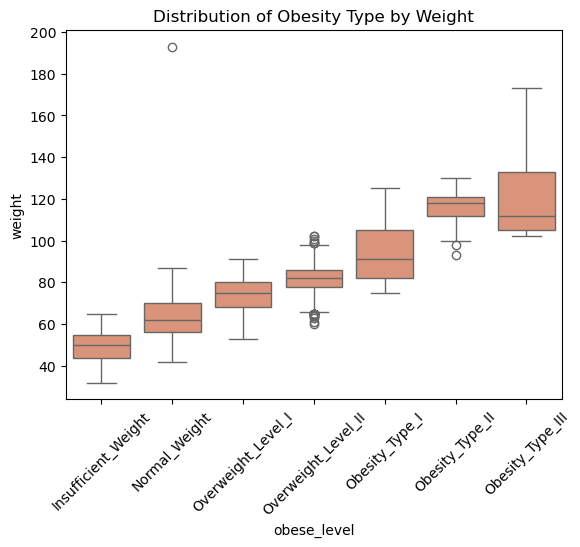

In [62]:
# Distribution of obesity types based on age

sns.boxplot(data=train, x='obese_level', y='weight', order=desired_order)
plt.title('Distribution of Obesity Type by Weight')
plt.xticks(rotation=45)
plt.show()

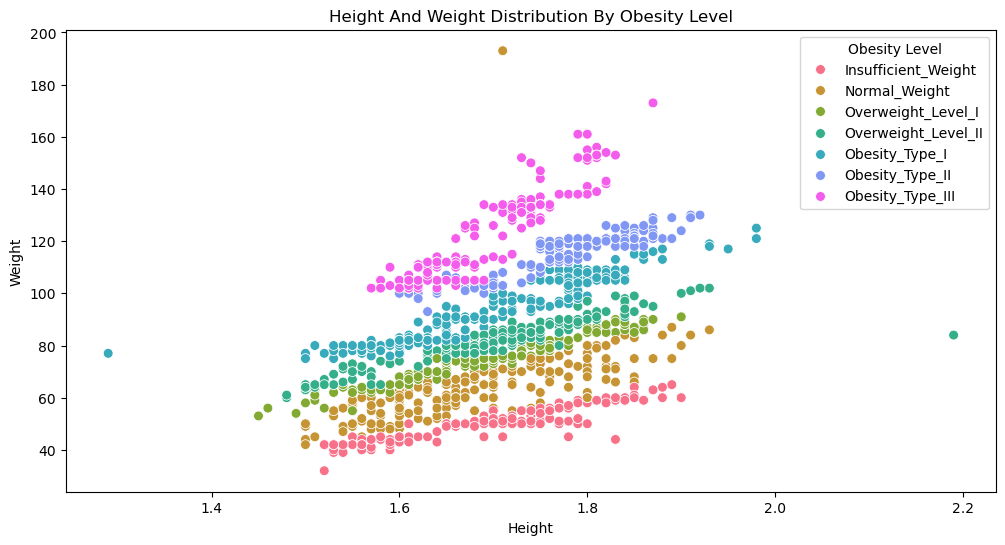

In [63]:
# Shows height and weight distributions by obesity level

plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='height', y='weight', hue='obese_level', s=50, hue_order=desired_order)
plt.title('Height And Weight Distribution By Obesity Level')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Obesity Level')
plt.show()

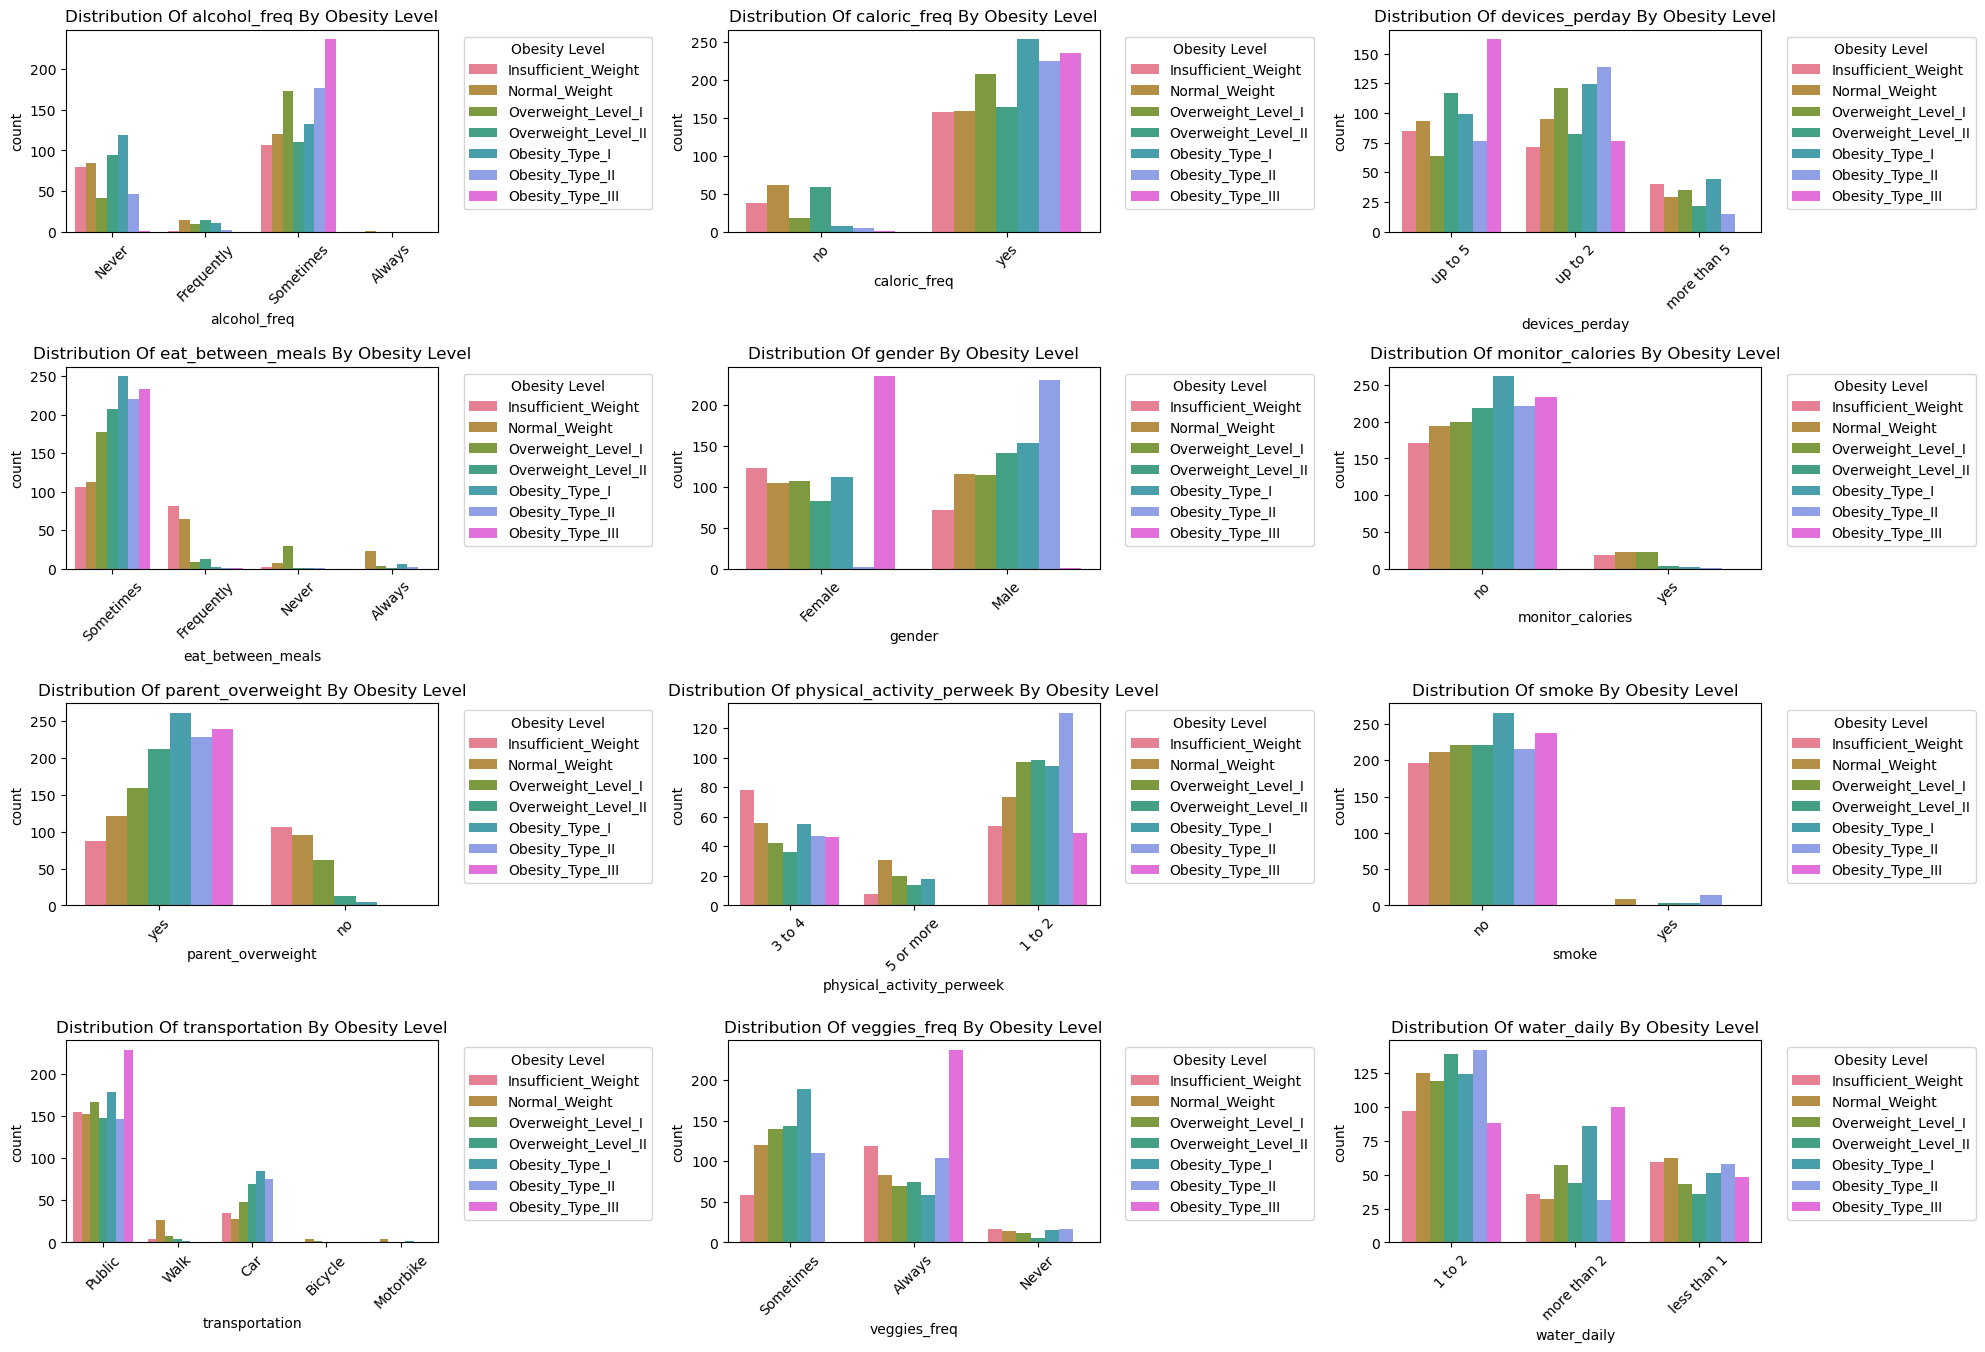

In [64]:
# Shows distributions of all catagorical columns against the different obesity types

categorical_cols = [col for col in train.columns if train[col].dtype == 'object']
categories = [col for col in categorical_cols if col not in ['obese_level', 'region']]

plt.figure(figsize=(20, 16))
for i, var in enumerate(categories, 1):
    plt.subplot(5, 3, i) 
    sns.countplot(data=train, x=var, hue='obese_level', hue_order=desired_order)
    plt.title(f'Distribution Of {var} By Obesity Level')
    plt.xticks(rotation=45)
    plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Findings 

##### From our visualizations we've found that:

- Obesity type 1 is the most common 
- Gender distribution shows notable differences 
- Most of the classes lie between ages 20-40 for all types (could show that age is negligible)
- Height and weight seem to be very usefull based on the clusters shown 
- We have normal weight, obese level I and II outliers that need to be removed due to logical reasoning 
- Higher obesity levels show less physical activity levels 
- Some columns showing similar patterns / little variation showing that they may need to be removed
- we also have an idea on highly correlated features that can be useful later

<a class="anchor" id="">

# Data Preprocessing 

</a>

In [2388]:
# Drop the useless columns and the outlier 
train = train.drop(train[train['obese_level'] == 'Normal_Weight']['weight'].idxmax())

train.drop("region", axis=1, inplace=True) # ALL SAME VALUES 
train.drop("marrital_status", axis=1, inplace=True) # ALL NAN VALUES

In [2389]:
# Filling in catagorical with missing values before OneHotEncoding 

# Mode imputer
impute_columns = ["gender", "transportation", "alcohol_freq", "eat_between_meals"]
mode_imputer = SimpleImputer(strategy='most_frequent')
train[impute_columns] = mode_imputer.fit_transform(train[impute_columns])

In [2390]:
# Ordinal encoding columns where there's a clear progression 
train["water_daily"] = train["water_daily"].replace({'less than 1': 0, '1 to 2': 1, 'more than 2': 2})
train["physical_activity_perweek"] = train["physical_activity_perweek"].replace({'1 to 2': 0, '3 to 4': 1, '5 or more': 2})
train["devices_perday"] = train["devices_perday"].replace({'up to 2': 0, 'up to 5': 1, 'more than 5': 2})
train["veggies_freq"] = train["veggies_freq"].replace({'Never': 0, 'Sometimes': 1, 'Always': 2})

# Converting Yes / No columns into binary 
binary_cols = ["monitor_calories", "parent_overweight", "smoke", "caloric_freq"]
train[binary_cols] = train[binary_cols].replace({'yes': 1, 'no': 0})

# Using One Hot Encoding on catagorical columns that wouldn't work with ranked ratings
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")
ohetransform = ohe.fit_transform(train[["gender", "transportation", "obese_level", "alcohol_freq", "eat_between_meals"]])
train = pd.concat([train, ohetransform], axis=1).drop(columns = ["gender", "transportation", "obese_level", "alcohol_freq", "eat_between_meals"])

In [2391]:
# Checking encoding worked as expected 

train.head(10)

,id,age,caloric_freq,devices_perday,height,meals_perday,monitor_calories,parent_overweight,physical_activity_perweek,siblings,...,obese_level_Overweight_Level_I,obese_level_Overweight_Level_II,alcohol_freq_Always,alcohol_freq_Frequently,alcohol_freq_Never,alcohol_freq_Sometimes,eat_between_meals_Always,eat_between_meals_Frequently,eat_between_meals_Never,eat_between_meals_Sometimes
0,1,21.0,0.0,1.0,1.62,3.0,0.0,1.0,NaN,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2,23.0,0.0,1.0,1.80,3.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,NaN,0.0,0.0,1.80,3.0,0.0,0.0,1.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,22.0,0.0,0.0,1.78,1.0,0.0,0.0,NaN,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,22.0,0.0,0.0,1.64,3.0,0.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,6,24.0,1.0,1.0,1.78,3.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7,21.0,1.0,1.0,1.72,3.0,1.0,1.0,1.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,8,22.0,0.0,0.0,1.65,3.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,9,41.0,1.0,1.0,1.80,3.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,27.0,1.0,0.0,1.93,1.0,0.0,1.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [2392]:
# Filling in missing values on the rest of the encoded columns 

# KNN imputer
columns_to_impute = train.columns
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
train[columns_to_impute] = knn_imputer.fit_transform(train[columns_to_impute])

In [2393]:
# Showing all the new columns and that there are no missing values 
train.isnull().sum()

id                                 0
age                                0
caloric_freq                       0
devices_perday                     0
height                             0
meals_perday                       0
monitor_calories                   0
parent_overweight                  0
physical_activity_perweek          0
siblings                           0
smoke                              0
veggies_freq                       0
water_daily                        0
weight                             0
gender_Female                      0
gender_Male                        0
transportation_Bicycle             0
transportation_Car                 0
transportation_Motorbike           0
transportation_Public              0
transportation_Walk                0
obese_level_Insufficient_Weight    0
obese_level_Normal_Weight          0
obese_level_Obesity_Type_I         0
obese_level_Obesity_Type_II        0
obese_level_Obesity_Type_III       0
obese_level_Overweight_Level_I     0
o

In [2394]:
# Calculate BMI and add as a new column in the dataset as the BMI is a good predictor of obesity

train['bmi'] = train['weight'] / (train['height'] ** 2)

In [2395]:
# Create classification columns based on bmi scores and scientific studies found online
# Source: https://www.ncbi.nlm.nih.gov/books/NBK541070/

train['underweight'] = (train['bmi'] < 18.5).astype(int)
train['normal_weight'] = ((train['bmi'] >= 18.5) & (train['bmi'] <= 24.9)).astype(int)
train['overweight'] = ((train['bmi'] >= 25) & (train['bmi'] <= 29.9)).astype(int)
train['obese'] = (train['bmi'] >= 30).astype(int)
train['obesity_class_I'] = ((train['bmi'] >= 30) & (train['bmi'] <= 34.9)).astype(int)
train['obesity_class_II'] = ((train['bmi'] >= 35) & (train['bmi'] <= 39.9)).astype(int)
train['obesity_class_III'] = (train['bmi'] >= 40).astype(int)

In [2396]:
train.columns # Check all columns 

Index(['id', 'age', 'caloric_freq', 'devices_perday', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'siblings', 'smoke', 'veggies_freq', 'water_daily', 'weight',
       'gender_Female', 'gender_Male', 'transportation_Bicycle',
       'transportation_Car', 'transportation_Motorbike',
       'transportation_Public', 'transportation_Walk',
       'obese_level_Insufficient_Weight', 'obese_level_Normal_Weight',
       'obese_level_Obesity_Type_I', 'obese_level_Obesity_Type_II',
       'obese_level_Obesity_Type_III', 'obese_level_Overweight_Level_I',
       'obese_level_Overweight_Level_II', 'alcohol_freq_Always',
       'alcohol_freq_Frequently', 'alcohol_freq_Never',
       'alcohol_freq_Sometimes', 'eat_between_meals_Always',
       'eat_between_meals_Frequently', 'eat_between_meals_Never',
       'eat_between_meals_Sometimes', 'bmi', 'underweight', 'normal_weight',
       'overweight', 'obese', 'obesity_class_I', 'obesity_cl

<a class="anchor" id="">

# Model selection

</a>

In [2398]:
# Establish a plethora of models to find the best performing ones for our data 

model_1 = LogisticRegression(max_iter=100000)
model_2 = KNeighborsClassifier()
model_3 = SVC()
model_4 = DecisionTreeClassifier()
model_5 = RandomForestClassifier()
model_6 = GaussianNB()
model_7 = GradientBoostingClassifier()

In [2399]:
# Select features based on correlation, And specify the target variables so we can do a test train split

features = [
       'age', 'caloric_freq', 'devices_perday', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'siblings', 'smoke', 'veggies_freq', 'water_daily', 'weight',
       'gender_Female', 'gender_Male',
       'transportation_Car', 'transportation_Motorbike',
       'transportation_Public', 'transportation_Walk',
       'alcohol_freq_Frequently', 'alcohol_freq_Never',
       'alcohol_freq_Sometimes', 'eat_between_meals_Always',
       'eat_between_meals_Frequently', 'eat_between_meals_Never',
       'eat_between_meals_Sometimes', 'bmi', 'underweight', 'normal_weight',
       'overweight', 'obese', 'obesity_class_I', 'obesity_class_II',
       'obesity_class_III'
]

target = [
    'obese_level_Insufficient_Weight', 'obese_level_Normal_Weight',
    'obese_level_Obesity_Type_I', 'obese_level_Obesity_Type_II',
    'obese_level_Obesity_Type_III', 'obese_level_Overweight_Level_I',
    'obese_level_Overweight_Level_II'
]
X = train[features]
y = train[target].idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [2400]:
model_1.fit(X_train, y_train)

C:\Users\henry\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000)

In [2401]:
model_2.fit(X_train,y_train)

KNeighborsClassifier()

In [2402]:
model_3.fit(X_train,y_train)

SVC()

In [2403]:
model_4.fit(X_train,y_train)

DecisionTreeClassifier()

In [2404]:
model_5.fit(X_train,y_train)

RandomForestClassifier()

In [2405]:
model_6.fit(X_train,y_train)

GaussianNB()

In [2406]:
model_7.fit(X_train,y_train)

GradientBoostingClassifier()

In [2407]:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7,]

models_names = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'GradientBoostingClassifier']

In [2408]:
# Compare models 
accuracy_results = {}

for model, name in zip(models, models_names):
    y_pred = model.predict(X_test)
    
    accuracy = f1_score(y_test, y_pred, average='macro')
    accuracy_results[name] = accuracy


sorted_accuracy_results = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)


print("Model Accuracy Comparison:")
for model_name, accuracy in sorted_accuracy_results:
    print(f"{model_name}: {accuracy:.4f}")
    f1_results[name] = f1_scores.mean()  

Model Accuracy Comparison:
RandomForestClassifier: 0.9440
GradientBoostingClassifier: 0.9419
LogisticRegression: 0.9320
DecisionTreeClassifier: 0.9200
KNeighborsClassifier: 0.9013
GaussianNB: 0.8886
SVC: 0.7112


#### Findings 
- We found the RandomForestClassifier, GradientBoostingClassifier, and LogisticRegression to be the most accurate models for our data, so we will use them in our ensable model

<a class="anchor" id="">

# Feature Selection

</a>

In [2504]:
# Recursive feature elimination to find desirable features

rfe = RFE(estimator=model, n_features_to_select=30) 
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Top 30 features:\n", selected_features)

Top 30 features:
 Index(['age', 'caloric_freq', 'devices_perday', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'siblings', 'smoke', 'veggies_freq', 'water_daily', 'weight',
       'gender_Female', 'gender_Male', 'transportation_Car',
       'transportation_Public', 'transportation_Walk', 'alcohol_freq_Never',
       'alcohol_freq_Sometimes', 'eat_between_meals_Always',
       'eat_between_meals_Frequently', 'eat_between_meals_Never',
       'eat_between_meals_Sometimes', 'bmi', 'underweight', 'normal_weight',
       'overweight', 'obesity_class_I', 'obesity_class_II'],
      dtype='object')


In [2412]:
# Mutual class information to find correlated features 

mi = mutual_info_classif(X_train, y_train)

mi_df = pd.DataFrame({"Feature": X_train.columns, "Mutual Information": mi})

mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)
print(mi_df.head(20))  

                         Feature  Mutual Information
26                           bmi            1.740407
12                        weight            1.141677
30                         obese            0.640095
29                    overweight            0.514405
31               obesity_class_I            0.379442
0                            age            0.352900
28                 normal_weight            0.338814
27                   underweight            0.316560
32              obesity_class_II            0.312792
33             obesity_class_III            0.287009
14                   gender_Male            0.202078
3                         height            0.197447
13                 gender_Female            0.196050
10                  veggies_freq            0.165503
25   eat_between_meals_Sometimes            0.136514
4                   meals_perday            0.123410
6              parent_overweight            0.119625
7      physical_activity_perweek            0.

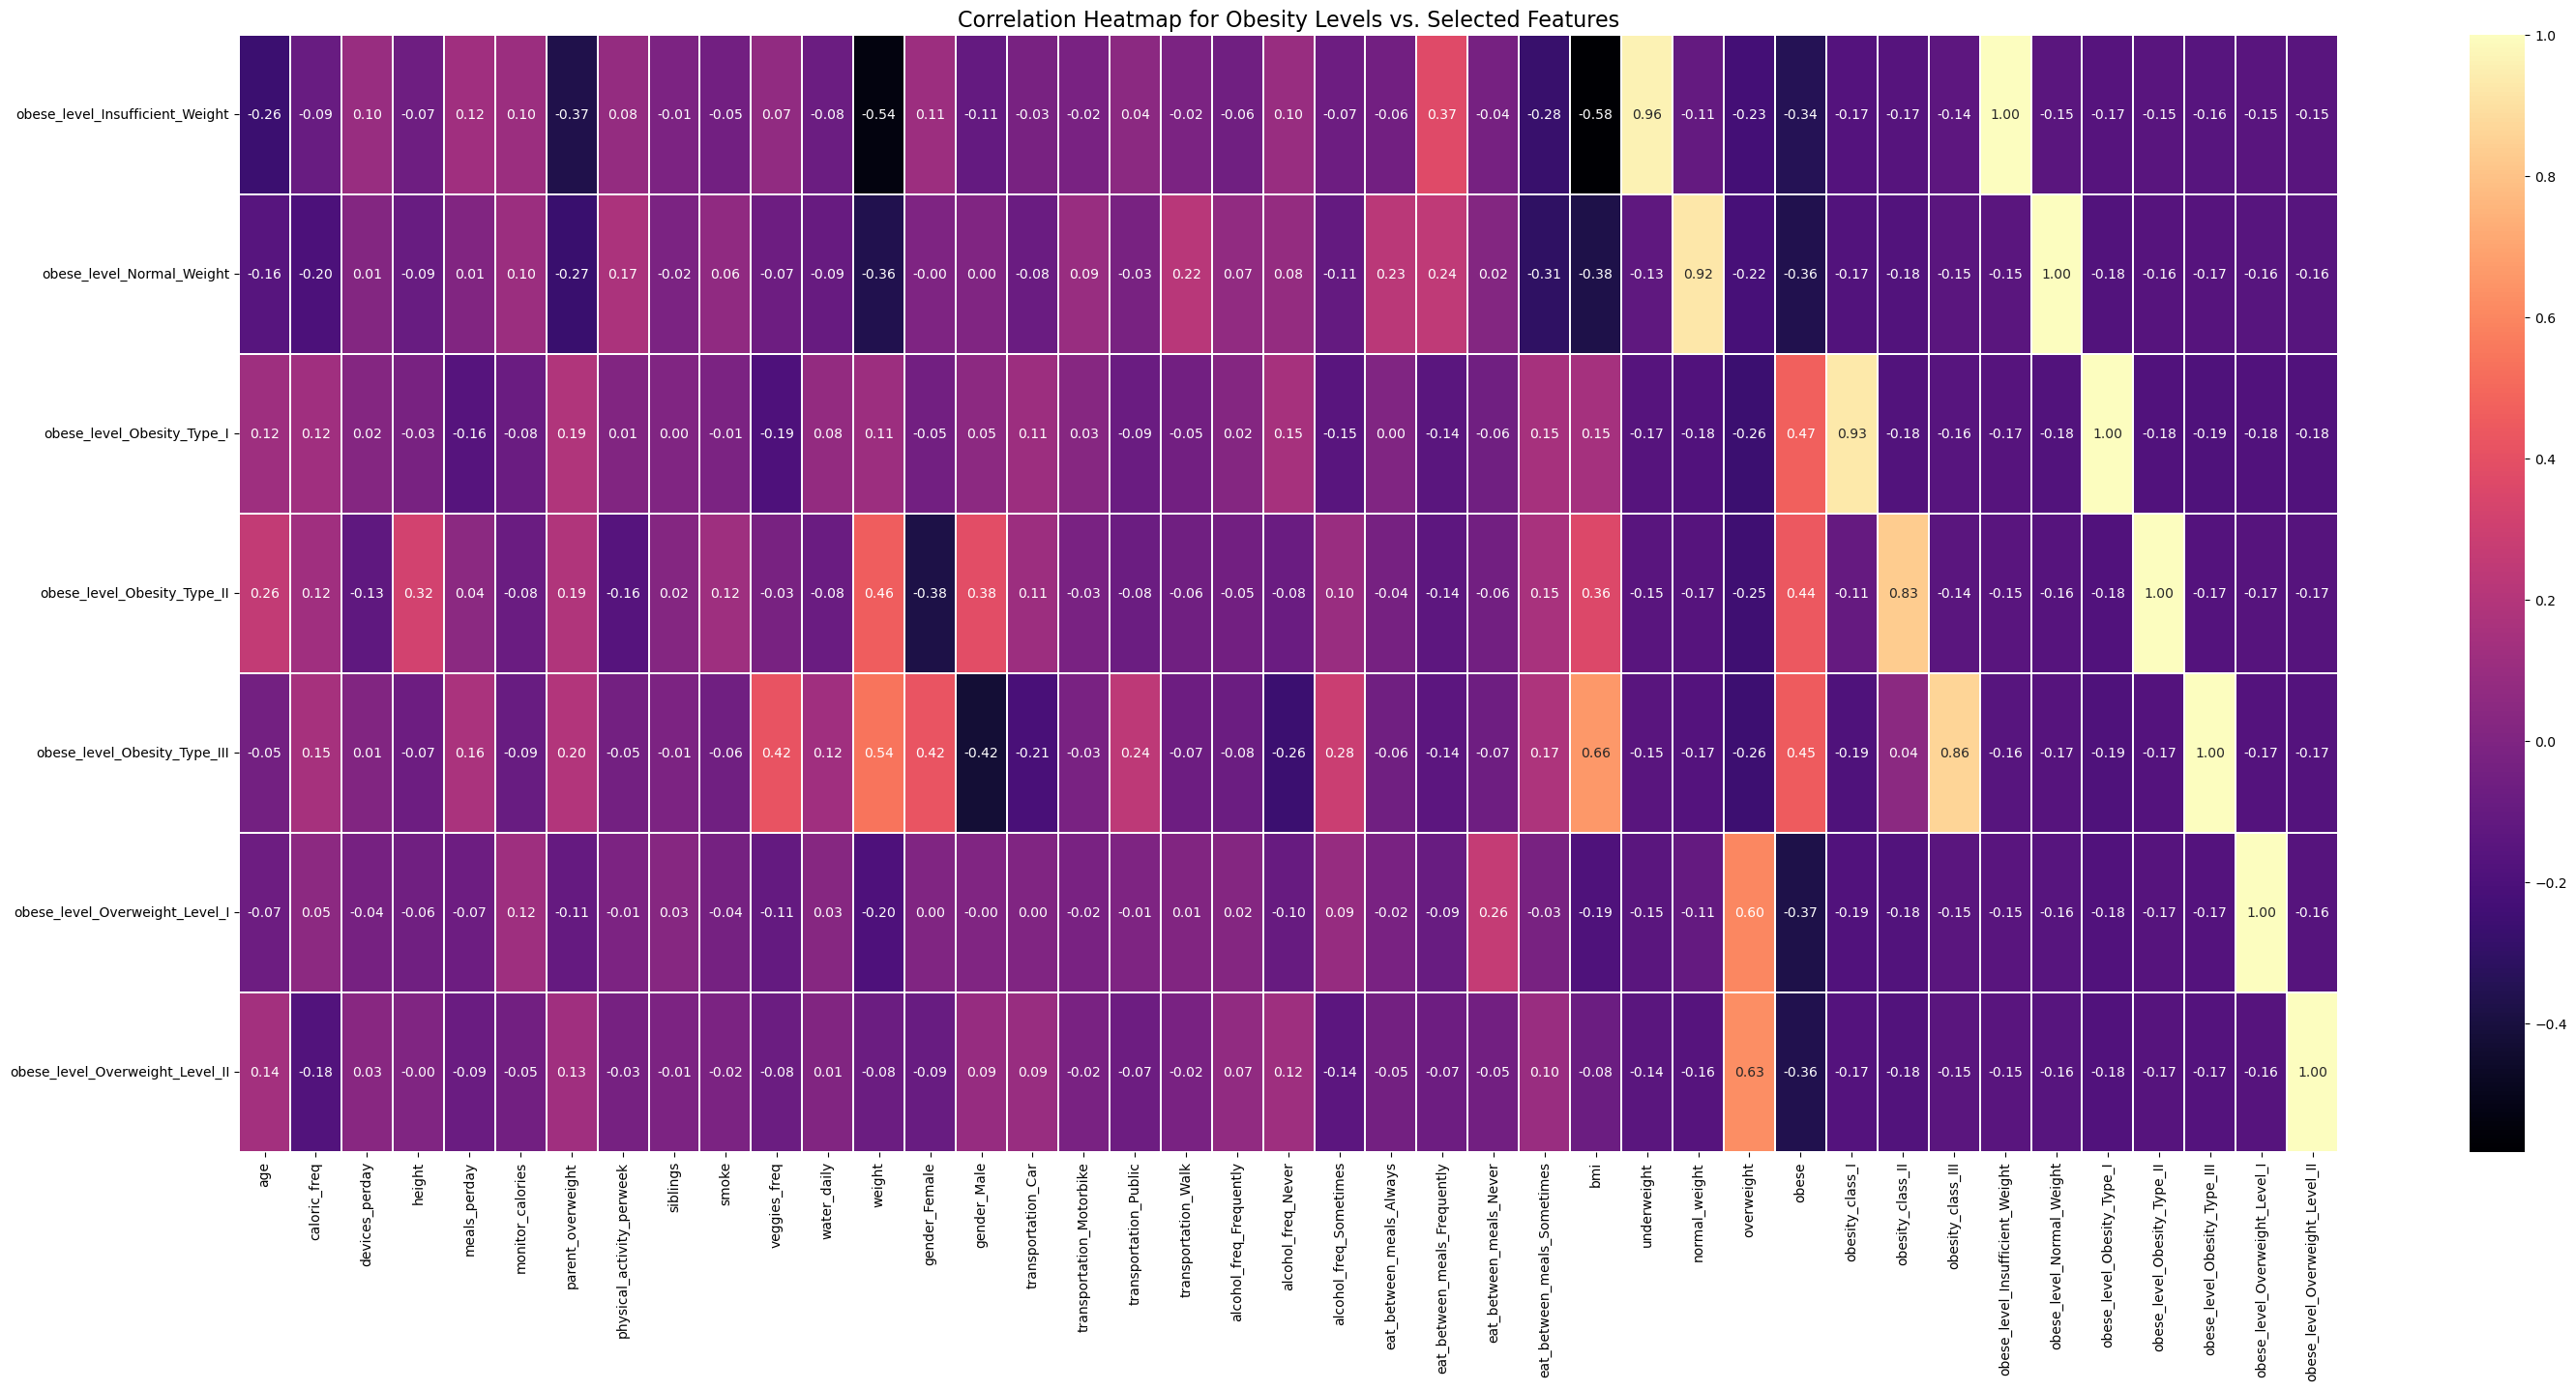

In [2413]:
# Correlation matrix 

all_columns = features + target 

correlation_matrix = train[all_columns].corr()

filtered_correlation_matrix = correlation_matrix.loc[:, target].T

plt.figure(figsize=(35, 15))  
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.2, annot_kws={'size': 10})
plt.title('Correlation Heatmap for Obesity Levels vs. Selected Features', fontsize=16)
plt.show()

<a class="anchor" id="">

# Model Tuning 

</a>

In [2415]:
# Random search into grid search for the gradient boosting classifier 

'''
model = GradientBoostingClassifier()
param_distributions = {
    'n_estimators': randint(25, 150),  
    'max_depth': randint(5, 15), 
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),  
    'learning_rate': uniform(0.01, 0.2),  
    'subsample': uniform(0.7, 0.3),  
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=50,  
    cv=3,  
    verbose=2,  
    n_jobs=-1, 
    random_state=42  
)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
print("Best parameters from RandomizedSearchCV:", best_params_random)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))
'''

'\nmodel = GradientBoostingClassifier()\nparam_distributions = {\n    \'n_estimators\': randint(25, 150),  \n    \'max_depth\': randint(5, 15), \n    \'min_samples_split\': randint(2, 10),  \n    \'min_samples_leaf\': randint(1, 5),  \n    \'learning_rate\': uniform(0.01, 0.2),  \n    \'subsample\': uniform(0.7, 0.3),  \n}\n\nrandom_search = RandomizedSearchCV(\n    model,\n    param_distributions=param_distributions,\n    n_iter=50,  \n    cv=3,  \n    verbose=2,  \n    n_jobs=-1, \n    random_state=42  \n)\n\nrandom_search.fit(X_train, y_train)\n\nbest_params_random = random_search.best_params_\nprint("Best parameters from RandomizedSearchCV:", best_params_random)\nprint("Best cross-validation score: {:.4f}".format(random_search.best_score_))\n'

In [2416]:
'''
# Define a narrower parameter grid around the best parameters
param_grid = {
    'n_estimators': [best_params_random['n_estimators'] - 10, 
                     best_params_random['n_estimators'], 
                     best_params_random['n_estimators'] + 10],
    
    'max_depth': [best_params_random['max_depth'] - 1, 
                  best_params_random['max_depth'], 
                  best_params_random['max_depth'] + 1],
    
    'min_samples_split': [best_params_random['min_samples_split'], 
                          best_params_random['min_samples_split'] + 1],
    
    'min_samples_leaf': [best_params_random['min_samples_leaf'] - 1, 
                         best_params_random['min_samples_leaf'], 
                         best_params_random['min_samples_leaf'] + 1],
    
    'learning_rate': [best_params_random['learning_rate'] * 0.8, 
                      best_params_random['learning_rate'], 
                      best_params_random['learning_rate'] * 1.2],
    
    'subsample': [max(0.7, best_params_random['subsample'] - 0.1), 
                  best_params_random['subsample'], 
                  min(1.0, best_params_random['subsample'] + 0.1)]
}

# Set up GridSearchCV with the narrowed parameter grid
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,  
    verbose=2,  
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

y_pred = grid_search.best_estimator_.predict(X_test)
print("Test set accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
'''

'\n# Define a narrower parameter grid around the best parameters\nparam_grid = {\n    \'n_estimators\': [best_params_random[\'n_estimators\'] - 10, \n                     best_params_random[\'n_estimators\'], \n                     best_params_random[\'n_estimators\'] + 10],\n    \n    \'max_depth\': [best_params_random[\'max_depth\'] - 1, \n                  best_params_random[\'max_depth\'], \n                  best_params_random[\'max_depth\'] + 1],\n    \n    \'min_samples_split\': [best_params_random[\'min_samples_split\'], \n                          best_params_random[\'min_samples_split\'] + 1],\n    \n    \'min_samples_leaf\': [best_params_random[\'min_samples_leaf\'] - 1, \n                         best_params_random[\'min_samples_leaf\'], \n                         best_params_random[\'min_samples_leaf\'] + 1],\n    \n    \'learning_rate\': [best_params_random[\'learning_rate\'] * 0.8, \n                      best_params_random[\'learning_rate\'], \n                      bes

In [2417]:
# Establish and fit the model with the best hyperparameters based on the searches

gbmodel = GradientBoostingClassifier(
        random_state=42,
        learning_rate=0.15, 
        max_depth=10, 
        min_samples_leaf=4, 
        min_samples_split=2, 
        n_estimators=1000, 
        subsample=0.93,
        max_features='log2', 
)

gbmodel.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=10,
                           max_features='log2', min_samples_leaf=4,
                           n_estimators=1000, random_state=42, subsample=0.93)

In [2418]:
# Do the same for the RandomForestClassifier

'''
model = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': randint(50, 300),  
    'max_depth': randint(5, 30),  
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5), 
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False],  
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=50, 
    cv=3, 
    verbose=2,  
    n_jobs=-1,  
    random_state=42 
)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
print("Best parameters from RandomizedSearchCV:", best_params_random)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))
'''

'\nmodel = RandomForestClassifier(random_state=42)\n\nparam_distributions = {\n    \'n_estimators\': randint(50, 300),  \n    \'max_depth\': randint(5, 30),  \n    \'min_samples_split\': randint(2, 10),  \n    \'min_samples_leaf\': randint(1, 5), \n    \'max_features\': [\'sqrt\', \'log2\', None],  \n    \'bootstrap\': [True, False],  \n}\n\n# Set up RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    model,\n    param_distributions=param_distributions,\n    n_iter=50, \n    cv=3, \n    verbose=2,  \n    n_jobs=-1,  \n    random_state=42 \n)\n\nrandom_search.fit(X_train, y_train)\n\nbest_params_random = random_search.best_params_\nprint("Best parameters from RandomizedSearchCV:", best_params_random)\nprint("Best cross-validation score: {:.4f}".format(random_search.best_score_))\n'

In [2419]:
''''# Define a narrower parameter grid around the best parameters
param_grid = {
    'n_estimators': [best_params_random['n_estimators'] - 50, 
                     best_params_random['n_estimators'], 
                     best_params_random['n_estimators'] + 50],
    
    'max_depth': [best_params_random['max_depth'] - 2, 
                  best_params_random['max_depth'], 
                  best_params_random['max_depth'] + 2],
    
    'min_samples_split': [best_params_random['min_samples_split'], 
                          best_params_random['min_samples_split'] + 1],
    
    'min_samples_leaf': [best_params_random['min_samples_leaf'], 
                         best_params_random['min_samples_leaf'] + 1,
                         best_params_random['min_samples_leaf'] + 1],
    
    'max_features': [best_params_random['max_features']],  # keep it fixed for fine-tuning
    'bootstrap': [best_params_random['bootstrap']]  # keep it fixed for fine-tuning
}

grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    verbose=2,  # display progress
    n_jobs=-1  # use all CPU cores
)

grid_search.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Predict with the best model and print results
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test set accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
'''

'\'# Define a narrower parameter grid around the best parameters\nparam_grid = {\n    \'n_estimators\': [best_params_random[\'n_estimators\'] - 50, \n                     best_params_random[\'n_estimators\'], \n                     best_params_random[\'n_estimators\'] + 50],\n    \n    \'max_depth\': [best_params_random[\'max_depth\'] - 2, \n                  best_params_random[\'max_depth\'], \n                  best_params_random[\'max_depth\'] + 2],\n    \n    \'min_samples_split\': [best_params_random[\'min_samples_split\'], \n                          best_params_random[\'min_samples_split\'] + 1],\n    \n    \'min_samples_leaf\': [best_params_random[\'min_samples_leaf\'], \n                         best_params_random[\'min_samples_leaf\'] + 1,\n                         best_params_random[\'min_samples_leaf\'] + 1],\n    \n    \'max_features\': [best_params_random[\'max_features\']],  # keep it fixed for fine-tuning\n    \'bootstrap\': [best_params_random[\'bootstrap\']]  # keep i

In [2420]:
# Establish and fit the model with the best hyperparameters based on the searches

rfmodel = RandomForestClassifier(
    bootstrap=False,
    max_depth=13,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=133,
)

rfmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=13, max_features='log2',
                       min_samples_split=4, n_estimators=133)

In [2421]:
'''# Do the same for Logistic Regression

model = LogisticRegression(solver='liblinear') 

param_distributions = {
    'C': uniform(0.001, 10),  
    'penalty': ['l1', 'l2'], 
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=50,  
    cv=3, 
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
print("Best parameters from RandomizedSearchCV:", best_params_random)
print("Best cross-validation score: {:.4f}".format(random_search.best_score_))'''

'# Do the same for Logistic Regression\n\nmodel = LogisticRegression(solver=\'liblinear\') \n\nparam_distributions = {\n    \'C\': uniform(0.001, 10),  \n    \'penalty\': [\'l1\', \'l2\'], \n}\n\nrandom_search = RandomizedSearchCV(\n    model,\n    param_distributions=param_distributions,\n    n_iter=50,  \n    cv=3, \n    verbose=2,\n    n_jobs=-1,\n    random_state=42\n)\n\nrandom_search.fit(X_train, y_train)\n\nbest_params_random = random_search.best_params_\nprint("Best parameters from RandomizedSearchCV:", best_params_random)\nprint("Best cross-validation score: {:.4f}".format(random_search.best_score_))'

In [2422]:
'''param_grid = {
    'C': [best_params_random['C'] * 0.5, best_params_random['C'], best_params_random['C'] * 2],
    'penalty': [best_params_random['penalty']]
}

grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_
print("Best parameters from GridSearchCV:", best_params_grid)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))'''

'param_grid = {\n    \'C\': [best_params_random[\'C\'] * 0.5, best_params_random[\'C\'], best_params_random[\'C\'] * 2],\n    \'penalty\': [best_params_random[\'penalty\']]\n}\n\ngrid_search = GridSearchCV(\n    model,\n    param_grid=param_grid,\n    cv=3,  # 3-fold cross-validation\n    verbose=2,\n    n_jobs=-1\n)\n\ngrid_search.fit(X_train, y_train)\n\nbest_params_grid = grid_search.best_params_\nprint("Best parameters from GridSearchCV:", best_params_grid)\nprint("Best cross-validation score: {:.4f}".format(grid_search.best_score_))'

In [2423]:
lrmodel = LogisticRegression(
    C=3.746401188473625,
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)

lrmodel.fit(X_train, y_train)

LogisticRegression(C=3.746401188473625, max_iter=1000, penalty='l1',
                   solver='liblinear')

<a class="anchor" id="">

# Final Model Implementation And Testing

</a>

In [2425]:
# Establish and fit a voting model to combine the two models
# Using weights skewed towards the gradient boost as it proved to be the best for performance 

voting_model = VotingClassifier(
    estimators=[('gb', gbmodel),
                ('rf', rfmodel),
                ('lr', lrmodel)],
    voting='soft',
    weights=[2, 1, 1],
    n_jobs=-1 
)

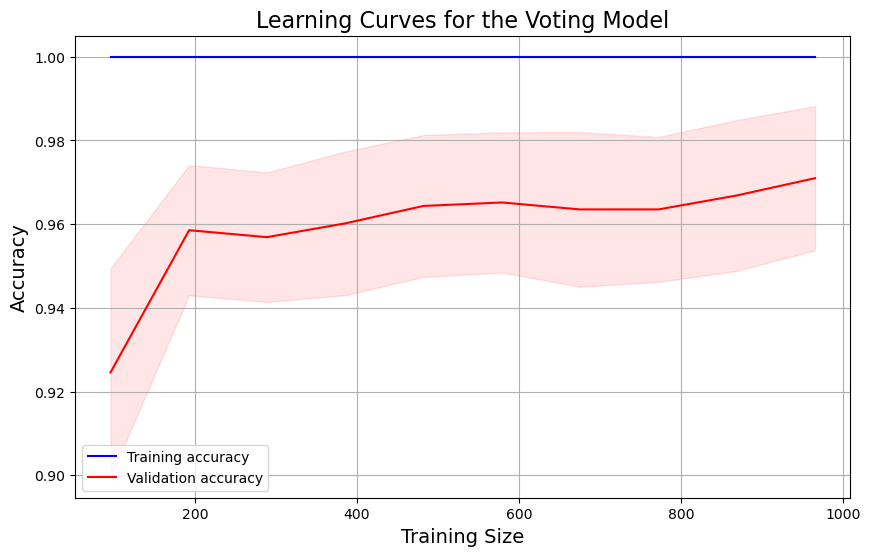

In [2426]:
# Learning curve used to see over / underfitting and variance of our predictions  

train_sizes, train_scores, val_scores = learning_curve(voting_model,
    X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', label='Training accuracy')
plt.plot(train_sizes, val_mean, color='red', label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.1)

plt.title('Learning Curves for the Voting Model', fontsize=16)
plt.xlabel('Training Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [2479]:
# Fit our final model and show the macro f1 score as it is the same scoring system used in the competition 
# Also show the cclassification report to give us better insights on prediction performance for specific labels 

voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)

macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", macro_f1)
print(classification_report(y_test, y_pred))

Macro F1 Score: 0.9489197630465538
                                 precision    recall  f1-score   support

obese_level_Insufficient_Weight       0.98      0.91      0.95        58
      obese_level_Normal_Weight       0.86      0.94      0.90        54
     obese_level_Obesity_Type_I       0.94      0.96      0.95        52
    obese_level_Obesity_Type_II       0.98      0.98      0.98        64
   obese_level_Obesity_Type_III       0.98      1.00      0.99        59
 obese_level_Overweight_Level_I       0.98      0.92      0.95        65
obese_level_Overweight_Level_II       0.90      0.92      0.91        51

                       accuracy                           0.95       403
                      macro avg       0.95      0.95      0.95       403
                   weighted avg       0.95      0.95      0.95       403



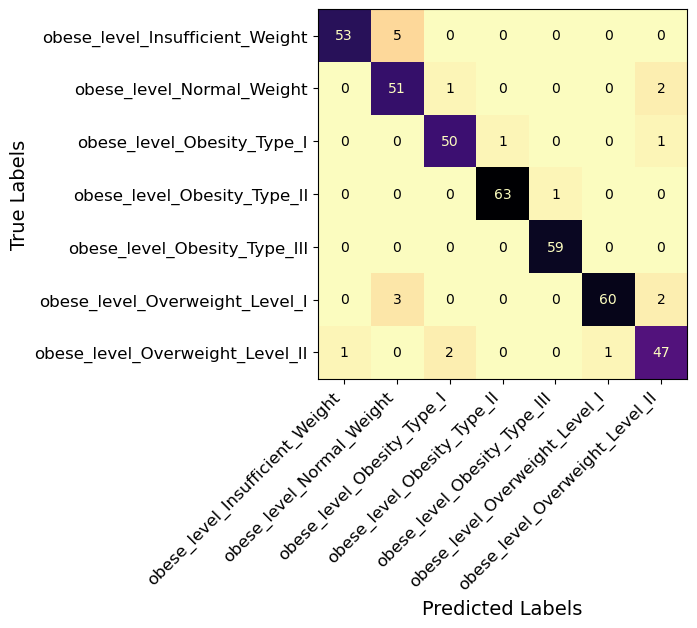

<Figure size 1000x600 with 0 Axes>

In [2481]:
# Use a ConfusionMatrixDisplay to show where our model is making incorrect predictions and where the errors are ending up 
# We see that we have issues in predicting the normal weight 

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, cmap="magma_r")
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.figure(figsize=(10, 6))

plt.tight_layout()
plt.show()

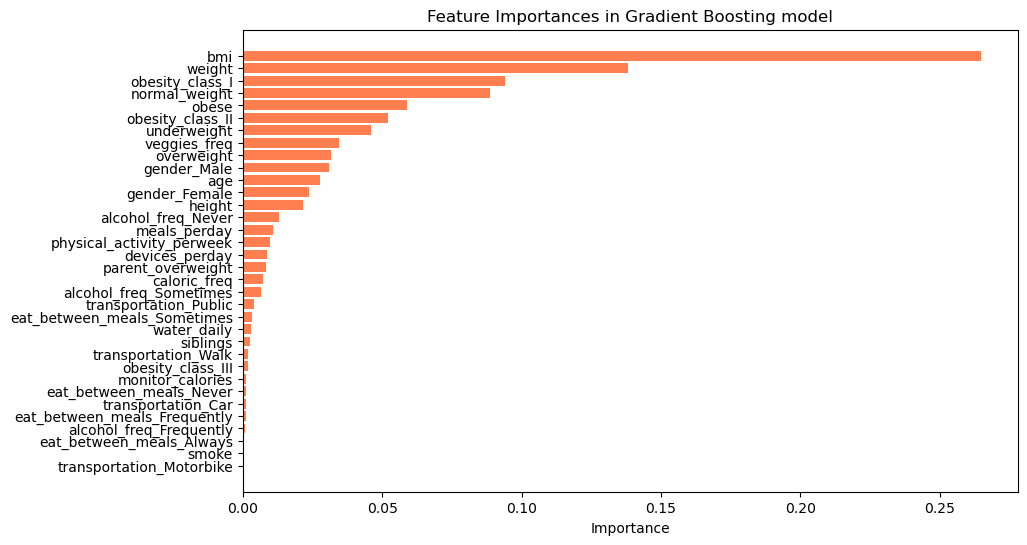

In [2482]:
# Plot the feature importances for Gradient Boosting to see high performing features in tuned model

feature_importances = gbmodel.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='coral')
plt.xlabel('Importance')
plt.title('Feature Importances in Gradient Boosting model')
plt.gca().invert_yaxis()  
plt.show()

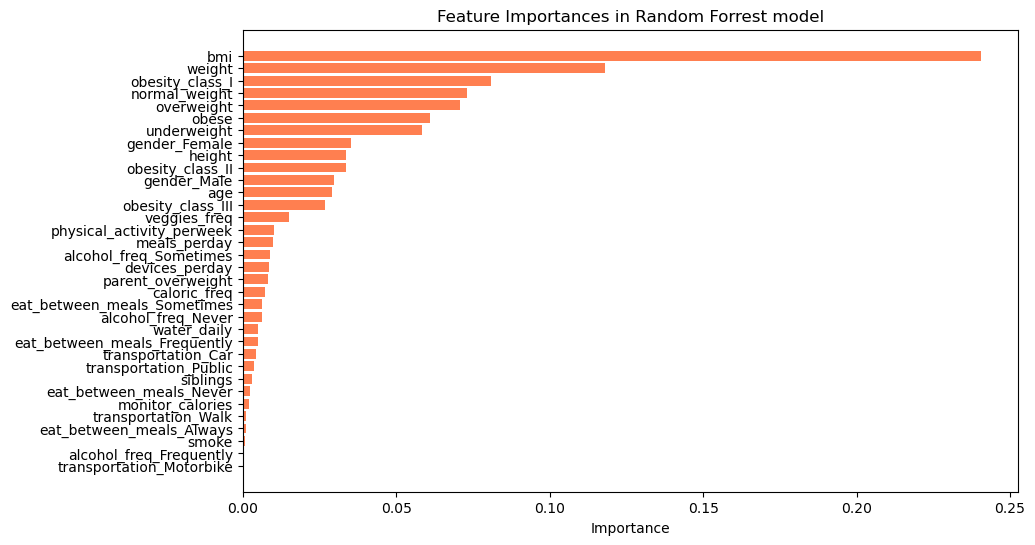

In [2484]:
# Plot the feature importances for Random forrest to see high performing features in tuned model

feature_importances = rfmodel.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='coral')
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forrest model')
plt.gca().invert_yaxis()  
plt.show()

<a class="anchor" id="">

# 5. Fitting model to test data

</a>

In [2487]:
# Drop the useless columns and the outlier 

test.drop("region", axis=1, inplace=True)
test.drop("marrital_status", axis=1, inplace=True) 

In [2488]:
# Filling in catagorical with missing values before OneHotEncoding 

impute_columns = ["gender", "transportation", "alcohol_freq", "eat_between_meals"]
mode_imputer = SimpleImputer(strategy='most_frequent')
test[impute_columns] = mode_imputer.fit_transform(test[impute_columns])

In [2492]:
# Ordinal encoding columns where there's a clear progression 
test["water_daily"] = test["water_daily"].replace({'less than 1': 0, '1 to 2': 1, 'more than 2': 2})
test["physical_activity_perweek"] = test["physical_activity_perweek"].replace({'1 to 2': 0, '3 to 4': 1, '5 or more': 2})
test["devices_perday"] = test["devices_perday"].replace({'up to 2': 0, 'up to 5': 1, 'more than 5': 2})
test["veggies_freq"] = test["veggies_freq"].replace({'Never': 0, 'Sometimes': 1, 'Always': 2})

# Converting Yes / No columns into binary 
binary_cols = ["monitor_calories", "parent_overweight", "smoke", "caloric_freq"]
test[binary_cols] = test[binary_cols].replace({'yes': 1, 'no': 0})

# Using One Hot Encoding on catagorical columns that wouldn't work with ranked ratings
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")
ohetransform = ohe.fit_transform(test[["gender", "transportation", "alcohol_freq", "eat_between_meals"]])
test = pd.concat([test, ohetransform], axis=1).drop(columns = ["gender", "transportation", "alcohol_freq", "eat_between_meals"])

In [2494]:
# Filling in missing values on the rest of the encoded columns 

# KNN imputer
columns_to_impute = test.columns
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
test[columns_to_impute] = knn_imputer.fit_transform(test[columns_to_impute])

In [2496]:
# Calculate BMI and add as a new column in the dataset as the BMI is a good predictor of obesity
test['bmi'] = test['weight'] / (test['height'] ** 2)

In [2498]:
# Create classification columns based on bmi scores and scientific studies found online

test['underweight'] = (test['bmi'] < 18.5).astype(int)
test['normal_weight'] = ((test['bmi'] >= 18.5) & (test['bmi'] <= 24.9)).astype(int)
test['overweight'] = ((test['bmi'] >= 25) & (test['bmi'] <= 29.9)).astype(int)
test['obese'] = (test['bmi'] >= 30).astype(int)
test['obesity_class_I'] = ((test['bmi'] >= 30) & (test['bmi'] <= 34.9)).astype(int)
test['obesity_class_II'] = ((test['bmi'] >= 35) & (test['bmi'] <= 39.9)).astype(int)
test['obesity_class_III'] = (test['bmi'] >= 40).astype(int)

In [2500]:
#Applying the model to the test data and saving it in the desired format for Kaggle submission

X_test = test[features]

y_pred = voting_model.predict(X_test)

results = pd.DataFrame({
    'id': test['id'],  
    'obese_level': [label.replace('obese_level_', '') for label in y_pred]  
})

In [2502]:
results.to_csv('Group14_Version82.csv', index=False)